# Markety Basket Analysis - Online Retail Database

En este artículo se hace un análisis de la canasta de mercado de un retail online de UK. La base de datos registra transacciones ocurridas entre el 01/12/2010 y 09/12/2011. Los datos fueron utilizados por primera vez en el siguiente artículo:

*Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197â€“208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).*

Se pueden descargar en el siguiente sitio web:
https://archive.ics.uci.edu/ml/datasets/Online%20Retail

Las variables que contiene son las siguientes:
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides. 

A continuación se cargan los paquetes a utilizar en el análisis y se ajustan algunos formatos para los resultados.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.4f' % x) # formato del output, 4 decimales
pd.set_option('display.max_columns', 100) # número máximo de columnas a mostrar en el terminal
pd.set_option('display.max_rows', 100) # número máximo de filas a mostrar en el terminal

A continuación se carga la base de datos y se examinan las variables que contiene. Sólo se utilizarán las variables 'InvoiceNo' y 'Description' en el análisis. 'InvoiceNo', el número de factura, permite identificar las transacciones, mientras que en 'Description' se describen los productos comprados por los clientes.

In [9]:
data = pd.read_csv('C:/Users/acuna/Dropbox/Consultora/Analisis/Market Basket Analysis/Online Retail.csv')
print('Variables (original): \n', data.columns)
print('\n')
data = data[['InvoiceNo', 'Description']]
print('Variables (subconjunto): \n', data.columns)

Variables (original): 
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


Variables (subconjunto): 
 Index(['InvoiceNo', 'Description'], dtype='object')


Luego se eliminan las observaciones con missing values ('NaN') y se examinan algunas características de la base de datos. La base de datos contiene un total de 540.455 observaciones (filas), que corresponden a un total de 24.446 transacciones que involucran una suma de 4223 productos.

In [10]:
data = data.dropna()
print('Data shape: \n', data.shape)
print('Número de transacciones: \n', data['InvoiceNo'].unique().shape)
print('Número de productos: \n', data['Description'].unique().shape)

Data shape: 
 (540455, 2)
Número de transacciones: 
 (24446,)
Número de productos: 
 (4223,)


En la siguiente celda se transforma la base de datos en un diccionario, que agrupa los productos transados en una lista, para cada número de factura. En total se tienen 24.446 entradas en el diccionario, que se corresponde con el número de transacciones mostrado anteriormente.

In [11]:
# Diccionario con ítems por transacción, según número de factura
basket = {}
for index, row in data.iterrows():
    key = row["InvoiceNo"]   
    #check key exists or not
    if key not in basket:
        basket[row["InvoiceNo"]] = []
        #append value
        basket[row["InvoiceNo"]].append(row["Description"])
    else:
        basket[row["InvoiceNo"]].append(row["Description"])

print('Número de entradas en el diccionario: \n', len(basket))

Número de entradas en el diccionario: 
 24446


Luego, el diccionario se transforma en una lista de listas, en la que cada lista agrupa los productos de cada transacción.

In [13]:
# List of lists
market_basket = list(basket.values())

La lista de listas se puede utilizar como input del TransactionEncoder, que transforma la lista de listas en una base de datos en la que cada fila corresponde a una transacción, y cada columna corresponde a un producto. En los valores, un 'Verdadero' indica que dicho producto estuvo involucrado en la transacción.

In [14]:
# One-Hot Encoding
encoder = TransactionEncoder().fit(market_basket)
onehot = encoder.transform(market_basket)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
print(onehot.head())

    4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

    DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
0               False                         False   
1               False                         False   
2               False                         False   
3               False                         False   
4               False                         False   

    I LOVE LONDON MINI RUCKSACK   NINE DRAWER OFFICE TIDY  \
0                         False                     False   
1                         False                     False   
2                         False                     False   
3         

Con esta base de datos ya se puede calcular el **support** de los productos individuales, que muestra el porcentaje de veces que cada producto estuvo en una transacción. Se muestran los 10 productos con mayor y menor support.

In [15]:
# Compute the support
support = onehot.mean().sort_values(ascending=False)
print('Productos con mayor support: \n', support.head(10))
print('\n')
print('Productos con menor support: \n', support.tail(10))

Productos con mayor support: 
 WHITE HANGING HEART T-LIGHT HOLDER   0.0942
REGENCY CAKESTAND 3 TIER             0.0887
JUMBO BAG RED RETROSPOT              0.0873
PARTY BUNTING                        0.0698
LUNCH BAG RED RETROSPOT              0.0657
ASSORTED COLOUR BIRD ORNAMENT        0.0600
SET OF 3 CAKE TINS PANTRY DESIGN     0.0596
PACK OF 72 RETROSPOT CAKE CASES      0.0546
LUNCH BAG  BLACK SKULL.              0.0530
NATURAL SLATE HEART CHALKBOARD       0.0518
dtype: float64


Productos con menor support: 
 BELL HEART ANTIQUE GOLD              0.0000
BIG POLKADOT MUG                     0.0000
PEARL & SHELL 42"NECKL. IVORY        0.0000
WHITE FRANGIPANI HAIR CLIP           0.0000
BIRD ON BRANCH CANVAS SCREEN         0.0000
FLOWER SHOP DESIGN MUG               0.0000
WHITE DOVE HONEYCOMB PAPER GARLAND   0.0000
BIRTHDAY BANNER TAPE                 0.0000
WHITE CHERRY LIGHTS                  0.0000
wrongly sold sets                    0.0000
dtype: float64


A continuación se aplica el algoritmo a priori, que filtra la base de datos, eliminando los productos y reglas de asociación con bajo support. De esta manera se reduce la cantidad total de combinaciones posibles de ítems, que puede ser un número signficativamente grande. Se ecogió un umbral de 0.01, y un tamaño de 2 ítems para las reglas de asociación. De esta manera, el número de asociaciones a analizar se restringe a 1.074.

In [16]:
frequent_items = apriori(onehot, min_support=0.01, max_len=2, use_colnames=True)
print(len(frequent_items))

1074


Luego, se calculan las reglas de asociación. Es posible filtrar los resultados según alguna medida y umbral, pero por ahora se opta por usar un umbral igual a 0.0 (no filtrar). Las reglas de asociación son las siguientes:


- **Support**: porcentaje de veces que aparece una regla de asociación sobre el total de transacciones. Puede no ser informativa, si se trata de ítems populares, que son comprados con frecuencia, independientemente uno del otro.


- **Confidence**: probabilidad de comprar el ítem Y dado que he comprado el ítem X. Será más cercano a 1 en la medida que los productos se compren en conjunto.


- **Lift**: si el indicador es mayor que 1 significa ue los ítems aparecen juntos en las transacciones más frecuentemente que lo que se esperaría sólo por al azar, por lo tanto, un valor alto del indicador, mayor que 1, sugiere que existe una asociación real entre ambos ítems.


- **Leverage**: indicador similar a Lift, pero se distribuye entre -1 y +1.


- **Conviction**: indica qué tan incorrecta sería una asociación observada asumiendo que dicha asociación se debe puramente al azar. Si es mayor que 1, entonces indica asociación.

In [18]:
rules = association_rules(frequent_items, metric='support', min_threshold=0.0)
print(len(rules))
print(rules.head())

868
                            antecedents                           consequents  \
0              (6 RIBBONS RUSTIC CHARM)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)              (6 RIBBONS RUSTIC CHARM)   
2     (PAPER CHAIN KIT 50'S CHRISTMAS )     (60 CAKE CASES VINTAGE CHRISTMAS)   
3     (60 CAKE CASES VINTAGE CHRISTMAS)     (PAPER CHAIN KIT 50'S CHRISTMAS )   
4   (PAPER CHAIN KIT VINTAGE CHRISTMAS)     (60 CAKE CASES VINTAGE CHRISTMAS)   

   antecedent support  consequent support  support  confidence    lift  \
0              0.0393              0.0942   0.0105      0.2674  2.8400   
1              0.0942              0.0393   0.0105      0.1116  2.8400   
2              0.0479              0.0254   0.0112      0.2333  9.1705   
3              0.0254              0.0479   0.0112      0.4389  9.1705   
4              0.0340              0.0254   0.0103      0.3041 11.9513   

   leverage  conviction  
0    0.0068      1.2365  
1    0.0068 

En la siguiente celda se muestra un scatter plot de los indicadores support y confidence, en que el tamaño de cada punto está dado por el indicador lift. Este gráfico permite verificar la observación de Bayardo y Agrawal (1999), de que algunos valores altos de lift están asociados a transacciones con bajo support, por lo que no deberían descartarse las reglas de asociación en base al support.

*Bayardo Jr., R.J. and Agrawal, R. (1999). Mining the Most Interesting Rules. In Proceedings of the Fifth ACM SIGKDD
International Conference on Knowledge Discovery and Data Mining (pp. 145-154).*

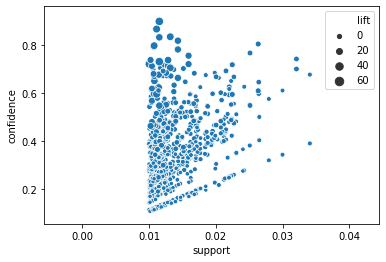

In [27]:
sns.scatterplot(x="support", y="confidence", size='lift', data = rules)
plt.show()

En consecuencia, se filtran las reglas de asociación en base a un Lift mayor que 1, aunque se obtiene el mismo dataset que antes.

In [19]:
rules = association_rules(frequent_items, metric='lift', min_threshold=1.0)
print(len(rules))
print(rules.head())

868
                            antecedents                           consequents  \
0              (6 RIBBONS RUSTIC CHARM)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)              (6 RIBBONS RUSTIC CHARM)   
2     (PAPER CHAIN KIT 50'S CHRISTMAS )     (60 CAKE CASES VINTAGE CHRISTMAS)   
3     (60 CAKE CASES VINTAGE CHRISTMAS)     (PAPER CHAIN KIT 50'S CHRISTMAS )   
4   (PAPER CHAIN KIT VINTAGE CHRISTMAS)     (60 CAKE CASES VINTAGE CHRISTMAS)   

   antecedent support  consequent support  support  confidence    lift  \
0              0.0393              0.0942   0.0105      0.2674  2.8400   
1              0.0942              0.0393   0.0105      0.1116  2.8400   
2              0.0479              0.0254   0.0112      0.2333  9.1705   
3              0.0254              0.0479   0.0112      0.4389  9.1705   
4              0.0340              0.0254   0.0103      0.3041 11.9513   

   leverage  conviction  
0    0.0068      1.2365  
1    0.0068 

A continuación se muestran las mejores reglas de asociación según **support**, es decir, se muestran las asociaciones más frecuentes:

In [29]:
print('Mejores reglas de asociación según support: \n:',
      rules.sort_values(by='support', ascending=False)[['antecedents', 'consequents','support']].head(10))

Mejores reglas de asociación según support: 
:                              antecedents                          consequents  \
364            (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
365            (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
212   (ROSES REGENCY TEACUP AND SAUCER )    (GREEN REGENCY TEACUP AND SAUCER)   
213    (GREEN REGENCY TEACUP AND SAUCER)   (ROSES REGENCY TEACUP AND SAUCER )   
424            (JUMBO BAG RED RETROSPOT)             (JUMBO STORAGE BAG SUKI)   
425             (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
421  (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
420            (JUMBO BAG RED RETROSPOT)  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
560            (LUNCH BAG  BLACK SKULL.)            (LUNCH BAG RED RETROSPOT)   
561            (LUNCH BAG RED RETROSPOT)            (LUNCH BAG  BLACK SKULL.)   

     support  
364   0.0341  
365   0.0341  
212   0.0321  
2

Luego se muestran las mejores reglas de asociación según **confidence**:

In [30]:
print('Mejores reglas de asociación según confidence: \n:',
      rules.sort_values(by='confidence', ascending=False)[['antecedents', 'consequents','confidence']].head(10))

Mejores reglas de asociación según confidence: 
:                               antecedents  \
804              (REGENCY TEA PLATE PINK)   
808              (REGENCY TEA PLATE PINK)   
806            (REGENCY TEA PLATE GREEN )   
867  (WOODEN TREE CHRISTMAS SCANDINAVIAN)   
843         (SET/6 RED SPOTTY PAPER CUPS)   
208      (PINK REGENCY TEACUP AND SAUCER)   
771       (POPPY'S PLAYHOUSE LIVINGROOM )   
768       (POPPY'S PLAYHOUSE LIVINGROOM )   
847        (SMALL MARSHMALLOWS PINK BOWL)   
757      (PINK REGENCY TEACUP AND SAUCER)   

                              consequents  confidence  
804            (REGENCY TEA PLATE GREEN )      0.8981  
808            (REGENCY TEA PLATE ROSES )      0.8662  
806            (REGENCY TEA PLATE ROSES )      0.8342  
867  (WOODEN STAR CHRISTMAS SCANDINAVIAN)      0.8319  
843       (SET/6 RED SPOTTY PAPER PLATES)      0.8178  
208     (GREEN REGENCY TEACUP AND SAUCER)      0.8040  
771           (POPPY'S PLAYHOUSE KITCHEN)      0.7970  
768   

Mejores reglas de asociación según **lift**:

In [31]:
print('Mejores reglas de asociación según lift: \n:',
      rules.sort_values(by='lift', ascending=False)[['antecedents', 'consequents','lift']].head(10))

Mejores reglas de asociación según lift: 
:                          antecedents                      consequents    lift
804         (REGENCY TEA PLATE PINK)       (REGENCY TEA PLATE GREEN ) 56.8774
805       (REGENCY TEA PLATE GREEN )         (REGENCY TEA PLATE PINK) 56.8774
803         (REGENCY MILK JUG PINK )       (REGENCY SUGAR BOWL GREEN) 51.9631
802       (REGENCY SUGAR BOWL GREEN)         (REGENCY MILK JUG PINK ) 51.9631
809       (REGENCY TEA PLATE ROSES )         (REGENCY TEA PLATE PINK) 46.3373
808         (REGENCY TEA PLATE PINK)       (REGENCY TEA PLATE ROSES ) 46.3373
769     (POPPY'S PLAYHOUSE BEDROOM )  (POPPY'S PLAYHOUSE LIVINGROOM ) 45.5602
768  (POPPY'S PLAYHOUSE LIVINGROOM )     (POPPY'S PLAYHOUSE BEDROOM ) 45.5602
807       (REGENCY TEA PLATE ROSES )       (REGENCY TEA PLATE GREEN ) 44.6231
806       (REGENCY TEA PLATE GREEN )       (REGENCY TEA PLATE ROSES ) 44.6231


Mejores reglas de asociación según **conviction**:

In [32]:
print('Mejores reglas de asociación según conviction: \n:',
      rules.sort_values(by='conviction', ascending=False)[['antecedents', 'consequents','conviction']].head(10))

Mejores reglas de asociación según conviction: 
:                               antecedents  \
804              (REGENCY TEA PLATE PINK)   
808              (REGENCY TEA PLATE PINK)   
806            (REGENCY TEA PLATE GREEN )   
867  (WOODEN TREE CHRISTMAS SCANDINAVIAN)   
843         (SET/6 RED SPOTTY PAPER CUPS)   
208      (PINK REGENCY TEACUP AND SAUCER)   
771       (POPPY'S PLAYHOUSE LIVINGROOM )   
768       (POPPY'S PLAYHOUSE LIVINGROOM )   
847        (SMALL MARSHMALLOWS PINK BOWL)   
757      (PINK REGENCY TEACUP AND SAUCER)   

                              consequents  conviction  
804            (REGENCY TEA PLATE GREEN )      9.6576  
808            (REGENCY TEA PLATE ROSES )      7.3364  
806            (REGENCY TEA PLATE ROSES )      5.9185  
867  (WOODEN STAR CHRISTMAS SCANDINAVIAN)      5.8221  
843       (SET/6 RED SPOTTY PAPER PLATES)      5.3689  
208     (GREEN REGENCY TEACUP AND SAUCER)      4.8813  
771           (POPPY'S PLAYHOUSE KITCHEN)      4.8367  
768   

A continuación se grafican las 10 mejores reglas según el indicador **support**. Mientras más arriba se encuentre el círculo, mejor será la regla. Las mejores reglas del gráfico también destacan por tener un gran lift.

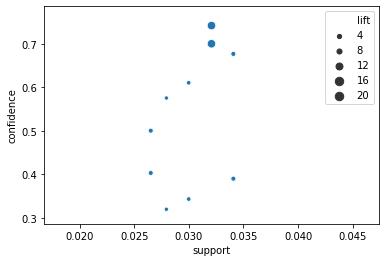

In [33]:
# Scatterplot
top_rules = rules.sort_values(by='support', ascending=False)[:10]
sns.scatterplot(x="support", y="confidence", size='lift', data = top_rules)
plt.show()

Luego se grafican las 10 mejores reglas según **confidence**. Se observa que en este caso, también se encuentran varias reglas con gran lift, aunque el support se ubica en un rango intermedio.

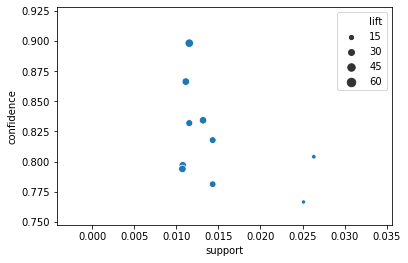

In [34]:
top_rules = rules.sort_values(by='confidence', ascending=False)[:10]
sns.scatterplot(x="support", y="confidence", size='lift', data = top_rules)
plt.show()

Mejores reglas según **lift**. Se observa que estas reglas tienen gran confidence, pero un support de valores intermedios.

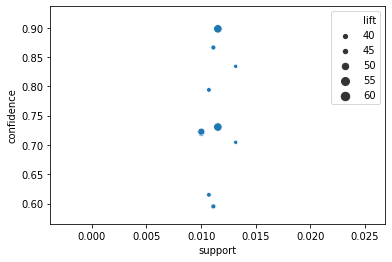

In [35]:
top_rules = rules.sort_values(by='lift', ascending=False)[:10]
sns.scatterplot(x="support", y="confidence", size='lift', data = top_rules)
plt.show()

Por último, se muestra un **heatmap** (mapa de calor) según support. Los valores más claros corresponden a reglas de asociación con mayor support.

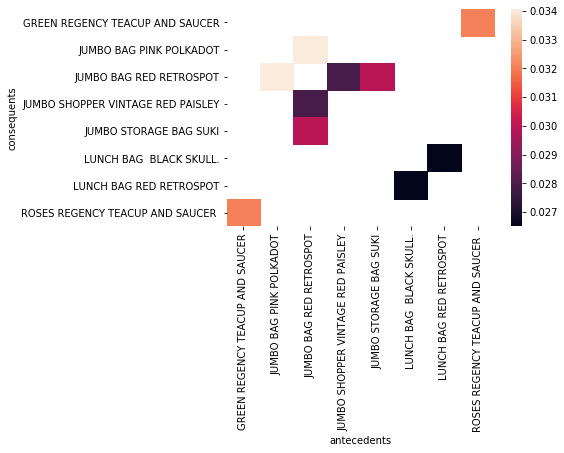

In [36]:
# Heatmap
top_rules = rules.sort_values(by='support', ascending=False)[:10]
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda a: ','.join(list(a)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda a: ','.join(list(a)))
pivot = top_rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)
plt.yticks(rotation=0)
plt.show()